In this notebook, we will make predictions about the quality of red wine based on its characteristics.
We are facing a regression problem, where the 'quality' variable is what we will predict.

### Load Libraries

In [61]:
# Import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

import time

# Load dataset
file_path = 'Data_Ejercicio_Lab3_winequality-white.xlsx'
data = pd.read_excel(file_path)

## 1. Data Preparation
1. Data Analisys

2. Data Cleanning

3. Data Preprocesing

### 1. Data Analisys

In [62]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Features analisys

In [64]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4898   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ fixed acidity           │   0 │     0 │    6.9 │   0.84 │    3.8 │    6.3 │    6.8 │   7.3 │   14 │   ▇▃   │  │
│ │ volatile acidity        │   0 │     0 │   0.28 │    0.1 │   0.08 │   0.21 │   0.26 │  0.32 │  1.1 │  ▆▇▁   │  │
│ │ citric acid             │   0 │     0 │   0.33 │   0.12 │      0 │   0.27 │   0.32 │  0.39 │  1.7 │  ▃▇▁   │  │
│ │ residual sugar          │   0 │     0 │    6.4 │    5.1 │    0.6 │    1.7 │    5.2 │   9.9 │   66 │   ▇▂   │  │
│ │ chlorides               │   0 │     0 │  0.046 │  0.022 │  0.009 │  0.036 │  0.043 │  0.05 │ 0.35 │   ▇    │  │
│ │ free sulfur dioxide     │   0 │     0 │     35 │     17 │      2 │     23 │     34 │    46 │  290 │   ▇▂   │  │
│ │ total sulfur dioxide    │   0 │     0 │    140 │     42 │      9 │    110 │    130 │   170 │  440 │  ▁▇▅   │  │
│ │ density                 │   0 │     0 │   0.99 │  0.003 │   0.99 │   0.99 │   0.99 │     1 │    1 │   ▇▃   │  │
│ │ pH                      │   0 │     0 │    3.2 │   0.15 │    2.7 │    3.1 │    3.2 │   3.3 │  3.8 │  ▃▇▃▁  │  │
│ │ sulphates               │   0 │     0 │   0.49 │   0.11 │   0.22 │   0.41 │   0.47 │  0.55 │  1.1 │  ▂▇▅▁  │  │
│ │ alcohol                 │   0 │     0 │     11 │    1.2 │      8 │    9.5 │     10 │    11 │   14 │ ▃▇▆▅▃  │  │
│ │ quality                 │   0 │     0 │    5.9 │   0.89 │      3 │      5 │      6 │     6 │    9 │  ▁▅▇▃▁ │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴───────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

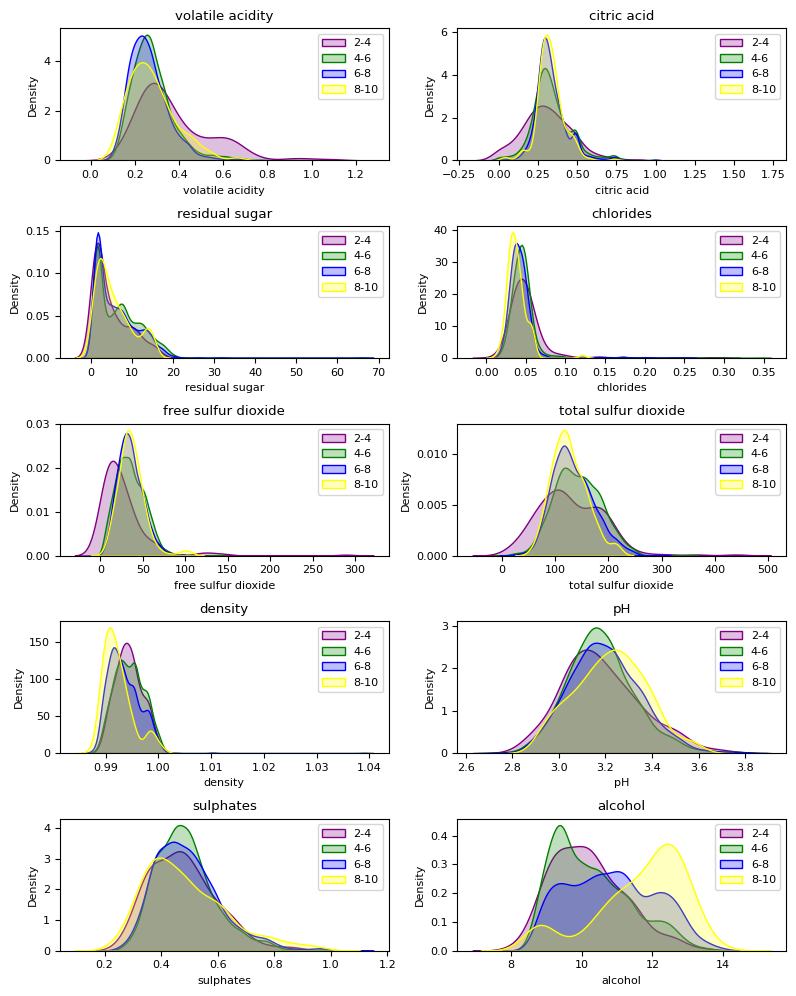

In [65]:
import seaborn as sns

features = list(data.columns[1:11])
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

# We define the quality ranges that interest us
quality_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10)]
colors = ['red', 'purple', 'green', 'blue', 'yellow']  # Colors for each quality range

for idx, ax in enumerate(axes):
    ax.figure
    feature = features[idx]
    # Create histograms for each quality range
    for q_range, color in zip(quality_ranges, colors):
        dfQ = data[(data['quality'] >= q_range[0]) & (data['quality'] <= q_range[1])]
        sns.kdeplot(dfQ[feature], color=color, ax=ax, label=f'{q_range[0]}-{q_range[1]}', fill=True)
    ax.legend(loc='upper right')
    ax.set_title(feature)

plt.tight_layout()
plt.show()

#### Quality feature Analisys

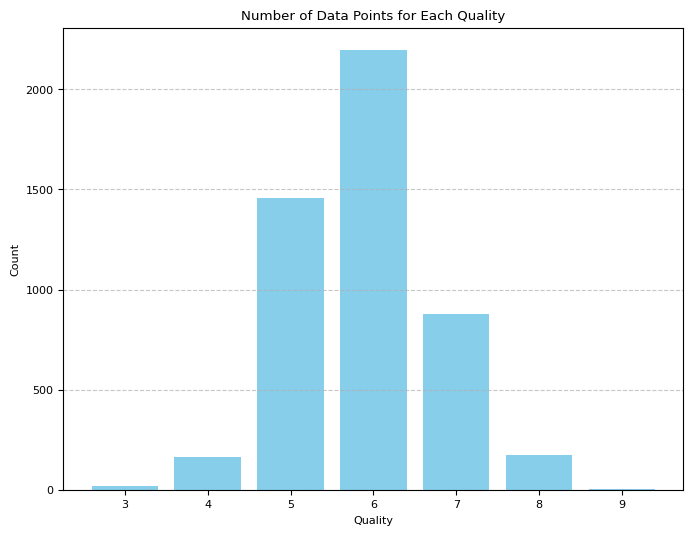

In [66]:
# Count the number of target variables
count_quality = data['quality'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(count_quality.index, count_quality.values, color='skyblue')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Quality')
plt.xticks(count_quality.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Data Cleaning

In [67]:
pd.DataFrame({"variable": data.isna().sum().index, "número_valores_ausentes": data.isna().sum().values}).sort_values(by="número_valores_ausentes")

,variable,número_valores_ausentes
0,fixed acidity,0
1,volatile acidity,0
2,citric acid,0
3,residual sugar,0
4,chlorides,0
5,free sulfur dioxide,0
6,total sulfur dioxide,0
7,density,0
8,pH,0
9,sulphates,0


## 3. Data Preprocesing
- Data Separation
- Data Scaling

### Separate data
We will separate 65% for train, 20% validation and 15% test. 
Also define 'quality' as the prediction feature.

In [68]:
# Definir 'quality' como la variable a predecir
y = data['quality'].copy()  # Target
x = data.drop('quality', axis=1)
print(x.shape)
print(y.shape)


(4898, 11)
(4898,)


In [69]:
# First split to separate out the test set (85% train, 15% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Now split the intermediate set into train and validation sets (76% entrenamiento, 10% validación)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(20/85), random_state=42)  # 0.2353 ≈ 20/85

# Verify the shapes of the resulting datasets
print("85% Entrenamiento:", x_train.shape, y_train.shape)
print("20% Validación:", x_val.shape, y_val.shape)
print("15% Prueba:", x_test.shape, y_test.shape)

85% Entrenamiento: (3183, 11) (3183,)
20% Validación: (980, 11) (980,)
15% Prueba: (735, 11) (735,)


### Standarization using Standard Scaler
We are not going to standarize the objective feature 'quality'.

In [70]:
# Create the StandardScaler object
scaler = StandardScaler()

# Standardize the training features
x_train_scaled = scaler.fit_transform(x_train)

# Apply the same transformation to the validation and test features
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Verify the standardized data
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)

x_train: (3183, 11)
y_train: (3183,)
x_val: (980, 11)
y_val: (980,)


In [71]:
print("Average training  value: ", x_train_scaled[:,1].mean())
print("Standard deviation training  value: ", x_train_scaled[:,1].std())

print("Average test value: ", x_test_scaled[:,1].mean())
print("Standard deviation test value: ", x_test_scaled[:,1].std())

Average training  value:  -4.269283638520866e-17
Standard deviation training  value:  0.9999999999999999
Average test value:  -0.06474854253710521
Standard deviation test value:  0.9304737096924686


In [72]:
y.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

## 4. PyTorch: Dataset y DataLoader


### Dataset

In [73]:
# Dataset and DataLoader: define the function for the dataset
class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.astype(np.float32), dtype=torch.float32)
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [74]:
# Define datasets for train, validation and testing
train_dataset = WineDataset(x_train, y_train)
val_dataset = WineDataset(x_val, y_val) # Create the dataset for validation data
test_dataset = WineDataset(x_test, y_test) # Create the dataset for test data

In [75]:
# Example of data with index 11
train_dataset.x[11]

tensor([9.6000e+00, 6.5500e-01, 2.1000e-01, 2.0000e+00, 3.9000e-02, 2.1000e+01,
        1.2000e+02, 9.9188e-01, 3.0000e+00, 1.0000e+00, 1.2600e+01])

In [76]:
train_dataset.y[11]

tensor(6.)

### Data Loader

In [77]:
batch_size = 32 

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=0) 
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=0) 

### Model Definition
- Entry size: 11 (dataset has 11 features)
- Layers: 3
    - Layer 1: 64 neurons
    - Layer 2: 32 neurons
    - Layer 3: 1 neurons
- ReLU activaion function for layers 1 and 2
- Dropout: 0.4 after layers 1 and 2


In [78]:
class WineQualityModel(nn.Module):
    def __init__(self, input_shape): 
        super(WineQualityModel, self).__init__()             
        self.fc1 = nn.Linear(input_shape, 64)
        self.dropout1 = nn.Dropout(0.4)  
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.4)  
        self.fc3 = nn.Linear(32, 1)  

    def forward(self, x):
        # Añadir los pasos a seguir en el forward pass
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x)) 
        x = self.fc3(x)
        return x

In [79]:
# Specify that we want to use a GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [80]:
# Initialize the model
model = WineQualityModel(input_shape=x.shape[1]).to(device)
print(model)

WineQualityModel(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [81]:
for i_batch, (x_train, y_train) in enumerate(train_dataloader):
    print("número de batch :", i_batch)
    print("x_train en i_batch : ", x_train.size())
    print("y_train en i_batch :", y_train.size())
    break

outputs = model(x_train.to(device))
print(outputs)

número de batch : 0
x_train en i_batch :  torch.Size([32, 11])
y_train en i_batch : torch.Size([32])
tensor([[ 0.7263],
        [ 0.2743],
        [ 0.9082],
        [-0.1570],
        [ 0.8311],
        [ 0.8465],
        [ 0.4649],
        [ 0.5753],
        [ 0.9888],
        [ 0.5428],
        [ 0.4166],
        [ 1.1268],
        [ 0.4112],
        [ 1.1289],
        [ 0.6716],
        [ 1.0172],
        [ 0.9838],
        [ 1.0797],
        [ 1.4075],
        [ 1.2458],
        [ 0.2682],
        [ 0.5570],
        [ 1.0894],
        [ 0.7616],
        [ 0.5415],
        [ 1.4622],
        [ 0.3588],
        [ 0.8700],
        [ 0.7672],
        [ 0.9568],
        [ 1.5158],
        [ 0.3953]], device='cuda:0', grad_fn=<AddmmBackward0>)


### Hyperparameters 

In [82]:
learning_rate = 0.001
epochs = 200
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss() # Specify the cost function

### Functions

#### Training 

In [83]:
def train(model, train_dataloader, optimizer, loss_fn):
    model.train()
    epoch_loss = 0
    for i_batch, (x_train, y_train) in enumerate(train_dataloader):
        x_train, y_train = x_train.to(device), y_train.to(device)  # Move data to GPU if available
        
        # Forward pass
        outputs = model(x_train)
        loss = loss_fn(outputs, y_train.reshape(-1, 1))
        
        # Backward and optimize
        optimizer.zero_grad()  # Reset the accumulated gradients
        loss.backward()   # Gradients
        optimizer.step()
        
        epoch_loss += loss.item()
    
    loss_train = epoch_loss / len(train_dataloader)
    
    return loss_train

#### Evaluation 

In [84]:
def evaluation(model, val_dataloader, loss_fn):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():

        for i_batch, (x_val, y_val) in enumerate(val_dataloader):
            x_val, y_val = x_val.to(device), y_val.to(device) 
            outputs = model(x_val)
            batch_loss = loss_fn(outputs, y_val.reshape(-1, 1))
            epoch_loss += batch_loss.item()
    
    loss_val = epoch_loss / len(val_dataloader) 
    
    return loss_val


#### Training Evaluation Loop

In [85]:
def training_evaluation_loop(epochs, model, train_dataloader, val_dataloader, optimizer, loss_fn):
    start = time.time()
    
    # Empty loss and accuracy lists to track values
    loss_values_train = []
    loss_values_val = []

    for epoch in range(epochs):

        loss_train = train(model, train_dataloader, optimizer, loss_fn)
        loss_values_train.append(loss_train)

        loss_val = evaluation(model, val_dataloader, loss_fn)
        loss_values_val.append(loss_val)

        # Print every 10 epochs train loss and val loss
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {loss_train}, Validation Loss: {loss_val}')

    end = time.time()
    total_time = end - start

    print(f'Total training time: {total_time}')

    return loss_values_train, loss_values_val

#### Predictions

In [86]:
def predictions(model, test_dataloader):
    predictions = []
    real_values = []

    model.eval()
    with torch.no_grad():
        for x_test, y_test in test_dataloader: 
            x_test, y_test = x_test.to(device), y_test.to(device)
            outputs = model(x_test)

            predictions.append(outputs.detach().cpu().numpy())
            real_values.append(y_test.detach().cpu().numpy())

    predictions = np.vstack(predictions)
    real_values = np.hstack(real_values)
    
    # Convert to tensors to calculate the loss
    predictions_tensor = torch.tensor(predictions).to(device)
    real_values_tensor = torch.tensor(real_values).to(device)
    
    # Metric for the regression to see the error between the predicted and real values
    test_loss = loss_fn(torch.tensor(predictions), torch.tensor(real_values))

    # Print the metric
    print(f'Test Loss: {test_loss.item()}')
    
    return predictions, real_values

### Training 

In [87]:
# Training and Evaluation
loss_values_train, loss_values_val = training_evaluation_loop(epochs, model, train_dataloader, val_dataloader, optimizer, loss_fn)


Epoch [10/200], Train Loss: 0.6230090615153313, Validation Loss: 0.5927508213827687
Epoch [20/200], Train Loss: 0.6101512372493744, Validation Loss: 0.579244339658368
Epoch [30/200], Train Loss: 0.6103880086541176, Validation Loss: 0.5938868032347772
Epoch [40/200], Train Loss: 0.593217702805996, Validation Loss: 0.7656481785158957
Epoch [50/200], Train Loss: 0.5961227551102638, Validation Loss: 0.5661522851836297
Epoch [60/200], Train Loss: 0.5995316365361214, Validation Loss: 0.5753969636655623
Epoch [70/200], Train Loss: 0.5473800882697105, Validation Loss: 0.5585209140854497
Epoch [80/200], Train Loss: 0.5622722488641739, Validation Loss: 0.5673185346588012
Epoch [90/200], Train Loss: 0.5590865583717823, Validation Loss: 0.6086341200336334
Epoch [100/200], Train Loss: 0.5459753143787384, Validation Loss: 0.549701371500569
Epoch [110/200], Train Loss: 0.5463310796022415, Validation Loss: 0.6117326530718035
Epoch [120/200], Train Loss: 0.5656932178139686, Validation Loss: 0.548987488

## Evaluation

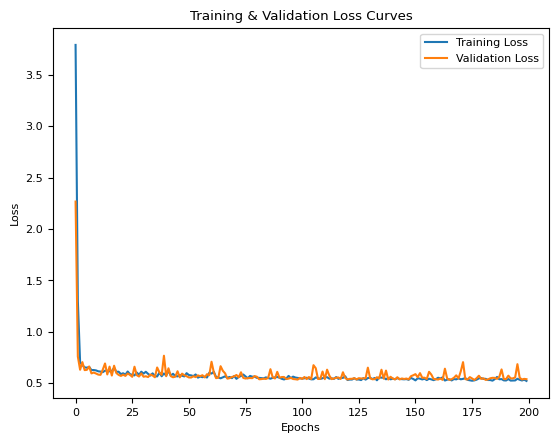

In [88]:
plt.plot(list(range(epochs)), loss_values_train, label='Training Loss')
plt.plot(list(range(epochs)), loss_values_val, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [89]:
# Predictions on the test set
predictions, real_values = predictions(model, test_dataloader)

# Display the first 10 real and predicted results
print("Primeros 10 resultados reales: ", real_values[:10])
print("Primeros 10 resultados predichos: ", predictions[:10])

Test Loss: 1.0871707201004028
Primeros 10 resultados reales:  [8. 3. 6. 5. 7. 5. 5. 4. 7. 8.]
Primeros 10 resultados predichos:  [[6.0876346]
 [5.0073333]
 [5.32404  ]
 [5.1775923]
 [6.20903  ]
 [5.1826544]
 [5.704157 ]
 [5.377865 ]
 [6.3484874]
 [6.746975 ]]


c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([735])) that is different to the input size (torch.Size([735, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The model shows promising performance with a good balance between learning and generalization. The graph illustrates how both training and validation loss decrease and stabilize after approximately 10 epochs. Additionally, they seem to converge to similar values and remain stable. All of this indicates that it is not significantly overfitting and learns efficiently from the data. However, the predicted values exhibit some variability, suggesting that there is still room for optimization to improve accuracy and the ability to reliably predict.

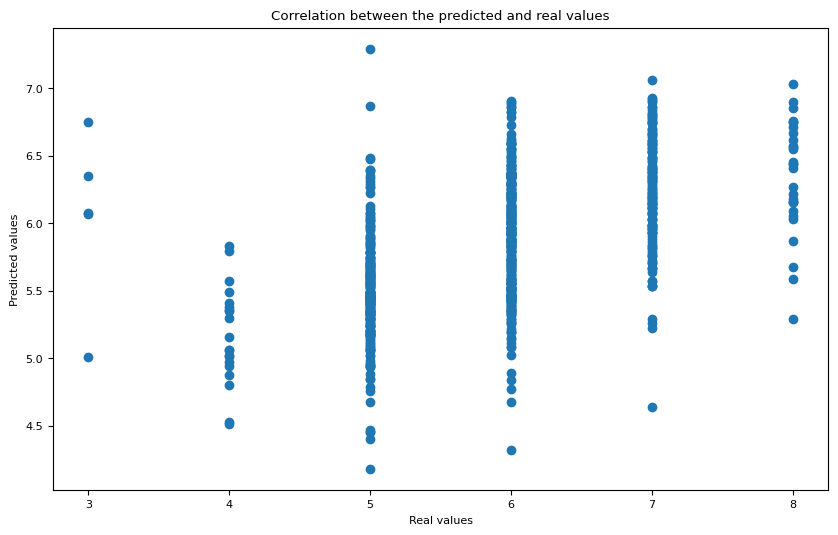

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predictions)
plt.title('Correlation between the predicted and real values')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()